Statistiques exploratoires 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

In [47]:
df = pd.read_csv('firms_with_reviews.csv')
df.head()

,_id,review_title,author_id,experience_date,extract_date,firm_id,review_date,review_note,review_text,review_url,author_localisation,author_name,author_url,firm_name,reponse,note,firm_info
0,66ccad2d63a995b7aa02bc03,Alvaro made my experience very…,66ccad2d63a995b7aa02bc01,2023-05-22T00:00:00,2024-08-23T00:00:00,turbodebt.com,2023-05-23T00:00:00,5.0,Alvaro made my experience very satisfactory! I...,/reviews/646cba0dc423446286686604,US,Keontra Reid,/users/646cba0ba8905b00124cdbfb,TurboDebt,True,5.0,"{'_id': '66db33a2bd030051b2456e59', 'page_url'..."
1,66ccad2d63a995b7aa02bc08,Great company to work with they really…,66ccad2d63a995b7aa02bc06,2023-05-22T00:00:00,2024-08-23T00:00:00,turbodebt.com,2023-05-23T00:00:00,5.0,Great company to work with they really underst...,/reviews/646cad6cc423446286685c19,US,Ismael Luciano,/users/646cad6b05330f0014134602,TurboDebt,True,5.0,"{'_id': '66db33a2bd030051b2456e59', 'page_url'..."
2,66ccad2d63a995b7aa02bc0d,HELPFUL..,66ccad2d63a995b7aa02bc0b,2023-05-22T00:00:00,2024-08-23T00:00:00,turbodebt.com,2023-05-23T00:00:00,5.0,HELPFUL... HONEST...TRUTHUL!!!!!!!!!!!!!!!!!!!,/reviews/646c8127706f837cb1eff2f6,US,Tony RODRIGUEZ,/users/646c8126a8905b00124cad7c,TurboDebt,True,5.0,"{'_id': '66db33a2bd030051b2456e59', 'page_url'..."
3,66ccad2d63a995b7aa02bc12,Making it very easy to understand and…,66ccad2d63a995b7aa02bc10,2023-05-22T00:00:00,2024-08-23T00:00:00,turbodebt.com,2023-05-23T00:00:00,5.0,Making it very easy to understand and answerin...,/reviews/646c6c27706f837cb1efe4ad,US,Melinda Hall,/users/646c6c254be4ac0013350e3c,TurboDebt,True,5.0,"{'_id': '66db33a2bd030051b2456e59', 'page_url'..."
4,66ccad2d63a995b7aa02bc17,Leif was awesome,66ccad2d63a995b7aa02bc15,2023-05-22T00:00:00,2024-08-23T00:00:00,turbodebt.com,2023-05-23T00:00:00,5.0,"Leif was awesome. Hes so friendly, easy to tal...",/reviews/646c4e46706f837cb1efd615,US,SDS,/users/646c4e454be4ac001334fb5f,TurboDebt,True,5.0,"{'_id': '66db33a2bd030051b2456e59', 'page_url'..."


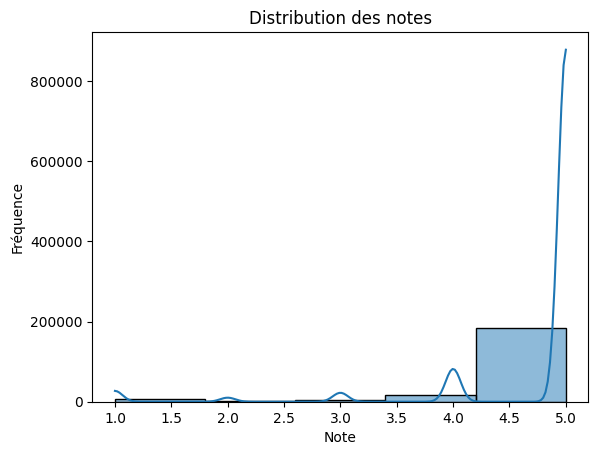

In [48]:
# Distribution des notes
sns.histplot(df['note'], bins=5, kde=True)
plt.title('Distribution des notes')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.show()

In [49]:
# Moyenne des notes par entreprise
mean_ratings = df.groupby('firm_name')['note'].mean().sort_values(ascending=False)
print(mean_ratings)


firm_name
A1venturesllc                   5.000000
AM Financial                    5.000000
Active Debt Relief              5.000000
Affirmative Debt Relief, LLC    5.000000
Alesure                         5.000000
                                  ...   
Hallock & Associates            1.416667
Kingstonesolutions              1.000000
Patriot Funding                 1.000000
Proper Funding                  1.000000
Vortex Debt Relief              1.000000
Name: note, Length: 210, dtype: float64


# 2. Analyse temporelle : Évolution des notes au fil du temps

In [50]:
# Convertir les colonnes de date en format datetime
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['experience_date'] = pd.to_datetime(df['experience_date'], errors='coerce')

In [51]:
# Grouper les données par mois et calculer la moyenne des notes
monthly_mean_ratings = df.resample('M', on='review_date')['note'].mean()

C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\1188261184.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_ratings = df.resample('M', on='review_date')['note'].mean()


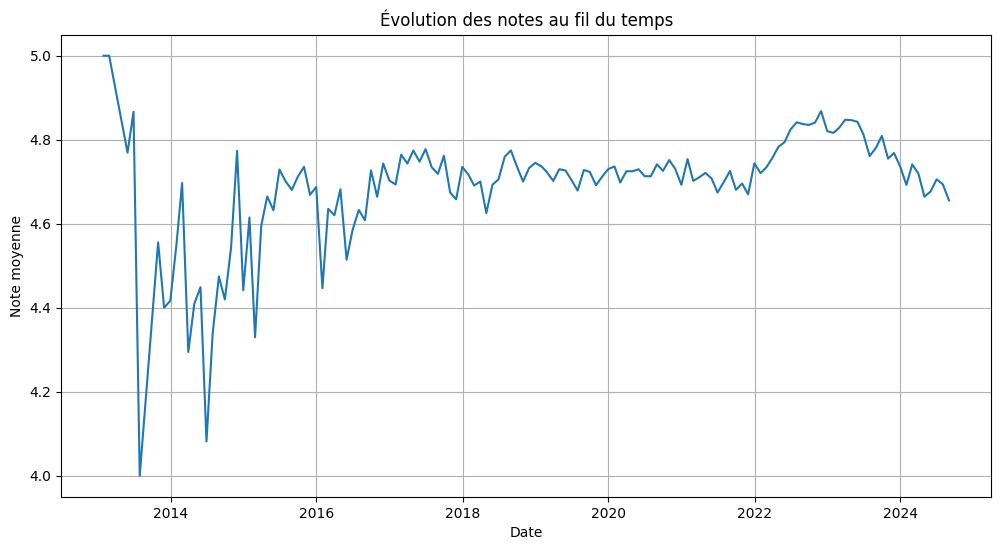

In [52]:
# Afficher l'évolution des notes au fil du temps
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_ratings.index, y=monthly_mean_ratings.values)
plt.title('Évolution des notes au fil du temps')
plt.xlabel('Date')
plt.ylabel('Note moyenne')
plt.grid(True)
plt.show()

In [53]:
# Analyse temporelle : Nombre de critiques par mois
monthly_review_count = df.resample('M', on='review_date').size()

C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\3228534401.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_review_count = df.resample('M', on='review_date').size()


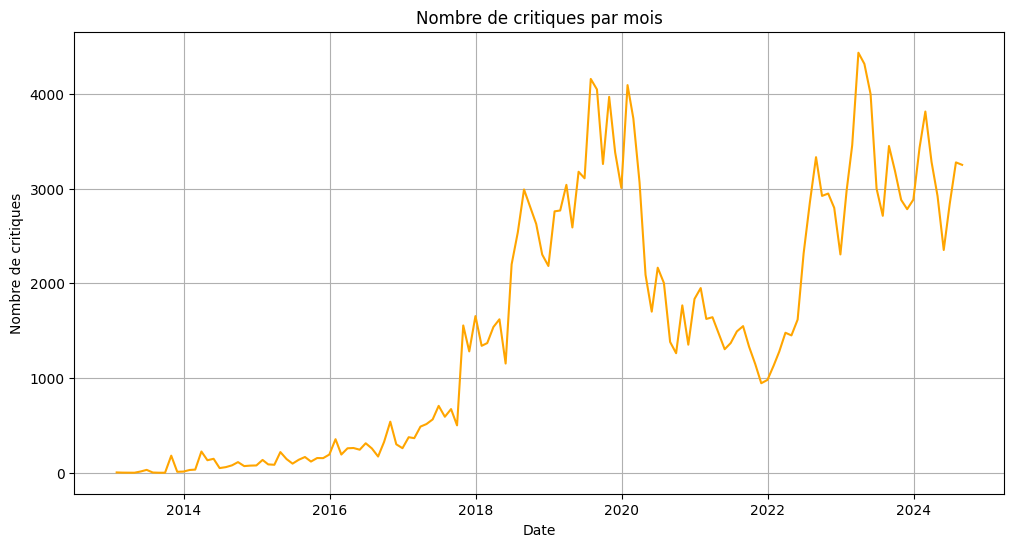

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_review_count.index, y=monthly_review_count.values, color='orange')
plt.title('Nombre de critiques par mois')
plt.xlabel('Date')
plt.ylabel('Nombre de critiques')
plt.grid(True)
plt.show()

# 3. Analyse des auteurs

In [55]:
# Nombre de critiques par auteur
author_review_counts = df['author_name'].value_counts()
print(author_review_counts.head(10))  # Afficher les 10 auteurs les plus actifs


author_name
customer    7783
Customer     840
Michael      354
David        332
John         332
Mary         300
Robert       295
James        282
Linda        275
Lisa         253
Name: count, dtype: int64


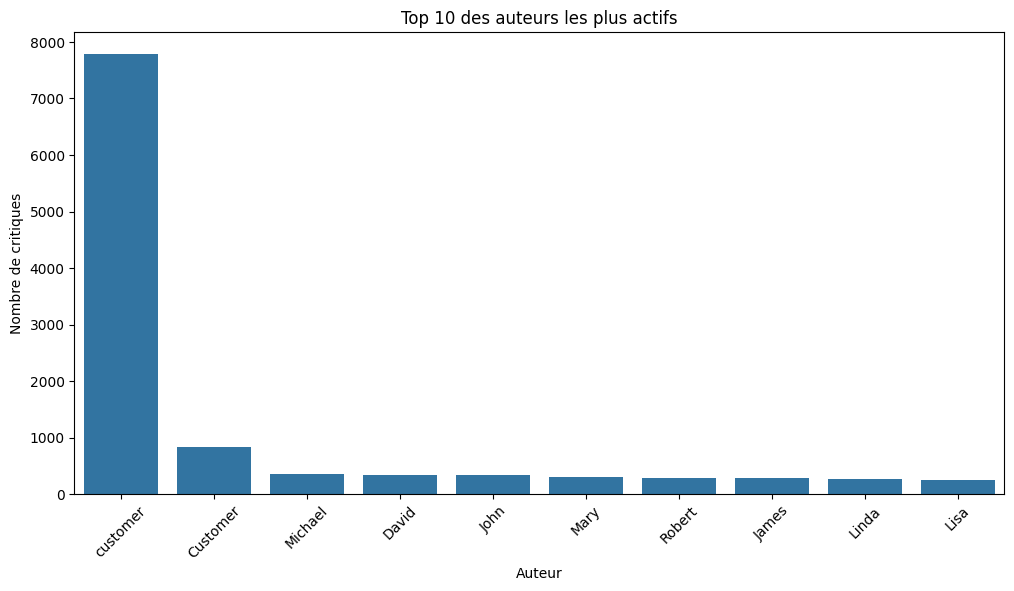

In [56]:
# Visualiser les auteurs les plus actifs
plt.figure(figsize=(12, 6))
sns.barplot(x=author_review_counts.head(10).index, y=author_review_counts.head(10).values)
plt.title('Top 10 des auteurs les plus actifs')
plt.xlabel('Auteur')
plt.ylabel('Nombre de critiques')
plt.xticks(rotation=45)
plt.show()

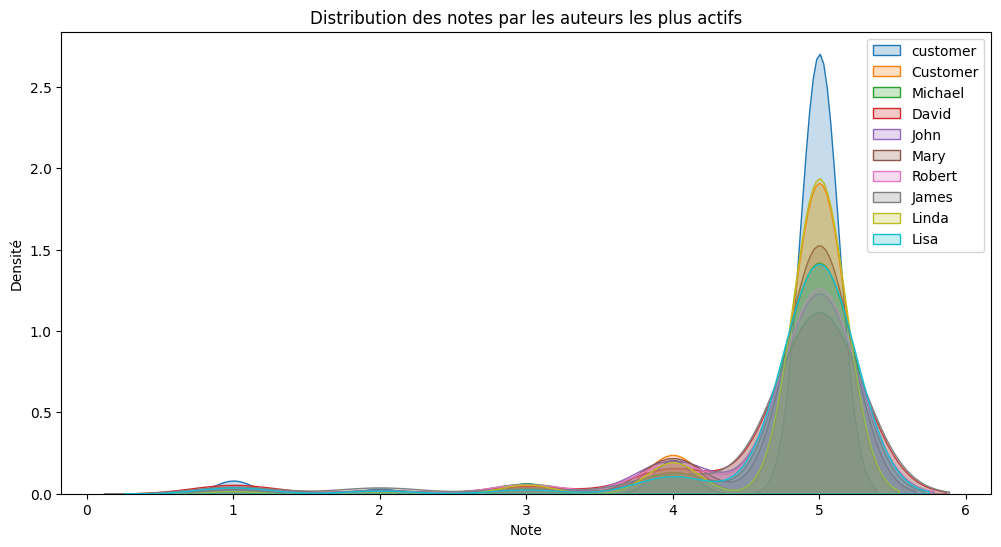

In [57]:
# Distribution des notes données par les auteurs les plus actifs
top_authors = author_review_counts.head(10).index
plt.figure(figsize=(12, 6))

for author in top_authors:
    sns.kdeplot(df[df['author_name'] == author]['note'], label=author, fill=True)

plt.title('Distribution des notes par les auteurs les plus actifs')
plt.xlabel('Note')
plt.ylabel('Densité')
plt.legend()
plt.show()

In [58]:
# Analyse de la moyenne des notes données par chaque auteur
author_mean_ratings = df.groupby('author_name')['note'].mean().sort_values(ascending=False)
print(author_mean_ratings.head(10))  # Afficher les 10 auteurs avec les notes moyennes les plus élevées


author_name
😊😊😊😊                   5.0
!Azwpy000              5.0
�Patricia Payne        5.0
"Happy Client" - JS    5.0
"JimBo"                5.0
"Just"                 5.0
"M"                    5.0
"MARCELLA WEMMER"      5.0
Инна Губаренко         5.0
Виктор Дёмин           5.0
Name: note, dtype: float64


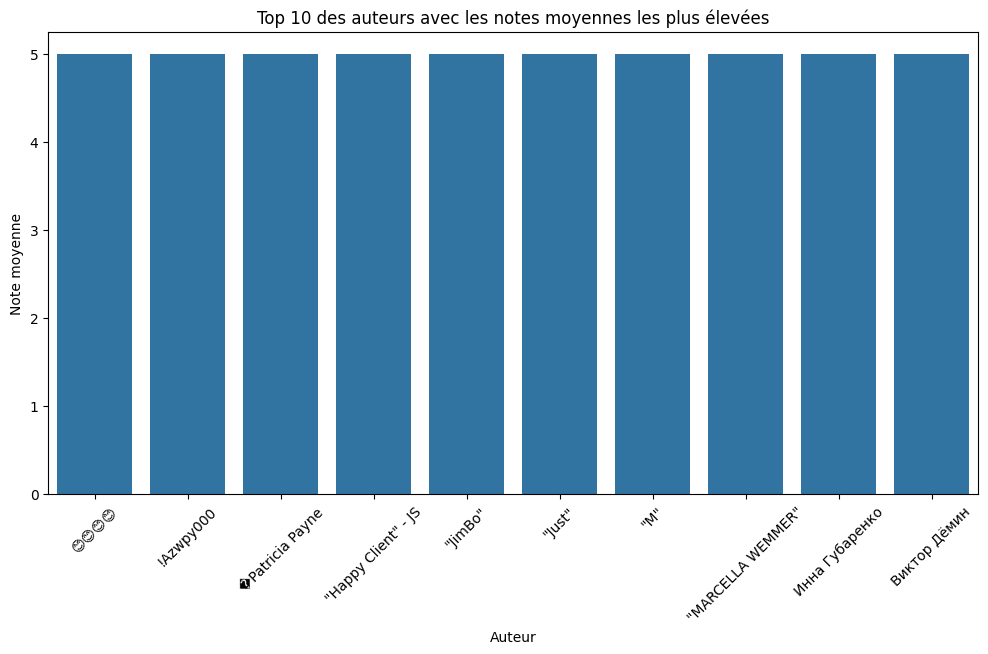

In [59]:
# Visualisation des auteurs avec les notes moyennes les plus élevées
plt.figure(figsize=(12, 6))
sns.barplot(x=author_mean_ratings.head(10).index, y=author_mean_ratings.head(10).values)
plt.title('Top 10 des auteurs avec les notes moyennes les plus élevées')
plt.xlabel('Auteur')
plt.ylabel('Note moyenne')
plt.xticks(rotation=45)
plt.show()

# 4. Analyse de texte sur les avis

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maryse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
# Prétraitement du texte
stop_words = set(stopwords.words('english'))

# Remplacer les valeurs manquantes par une chaîne vide avant le nettoyage
df['cleaned_review_text'] = df['review_text'].fillna('')

df['cleaned_review_text'] = df['cleaned_review_text'].str.lower().str.replace('[^\w\s]', '')

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\2065228071.py:7: SyntaxWarning: invalid escape sequence '\w'
  df['cleaned_review_text'] = df['cleaned_review_text'].str.lower().str.replace('[^\w\s]', '')


In [62]:
# Supprimer les stopwords
df['cleaned_review_text'] = df['cleaned_review_text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

In [63]:
# Concatenation de tous les textes pour le WordCloud
all_reviews = ' '.join(df['cleaned_review_text'])


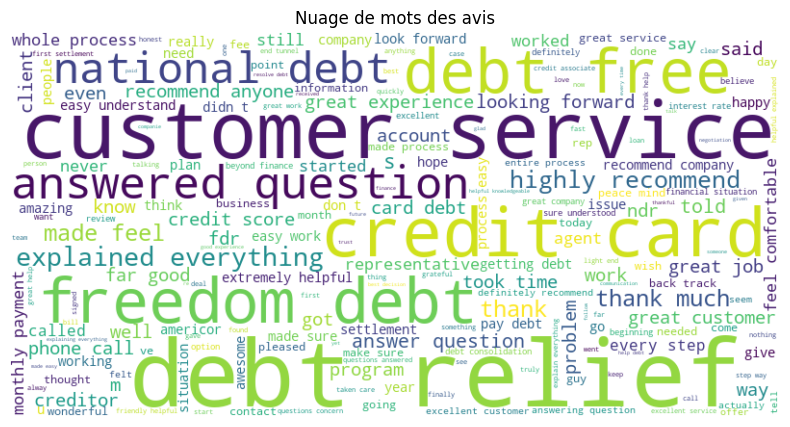

In [64]:
# Création du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
# Affichage du nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des avis')
plt.show()

In [65]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Maryse\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [67]:
# Analyse de sentiment
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


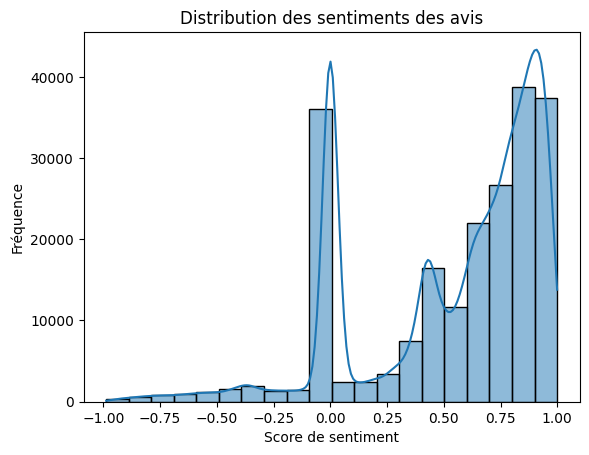

In [68]:
# Distribution des sentiments
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Distribution des sentiments des avis')
plt.xlabel('Score de sentiment')
plt.ylabel('Fréquence')
plt.show()


In [69]:
# Sentiment moyen par entreprise
mean_sentiments = df.groupby('firm_name')['sentiment'].mean().sort_values(ascending=False)
print(mean_sentiments)

firm_name
Clearstarttoday                         0.974100
AM Financial                            0.962800
Debt Advice USA                         0.951400
True Fulfillment Credit Repair          0.945800
Cooperscreditconsultinginternational    0.927900
                                          ...   
Vortex Debt Relief                      0.000000
Ready Payday Loans                     -0.031900
Hallock & Associates                   -0.103567
Prime Debt Settlement                  -0.200300
Kingstonesolutions                     -0.783600
Name: sentiment, Length: 210, dtype: float64


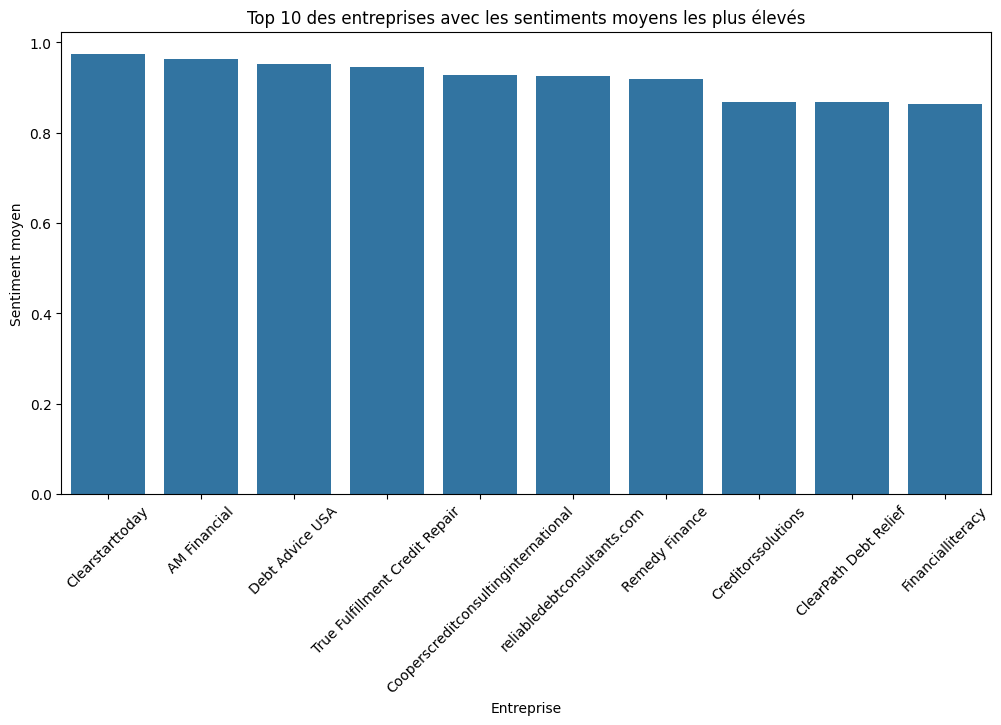

In [70]:
# Visualisation des sentiments moyens par entreprise
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_sentiments.head(10).index, y=mean_sentiments.head(10).values)
plt.title('Top 10 des entreprises avec les sentiments moyens les plus élevés')
plt.xlabel('Entreprise')
plt.ylabel('Sentiment moyen')
plt.xticks(rotation=45)
plt.show()

5. Répartition des réponses

In [71]:
# Assurez-vous que la colonne 'reponse' est au format booléen
df['reponse'] = df['reponse'].astype(bool)

In [72]:
# Calculer la répartition des réponses
response_distribution = df['reponse'].value_counts(normalize=True) * 100

# Afficher la répartition
print(response_distribution)

reponse
True     54.944164
False    45.055836
Name: proportion, dtype: float64


C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\3873463607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_distribution.index, y=response_distribution.values, palette='pastel')


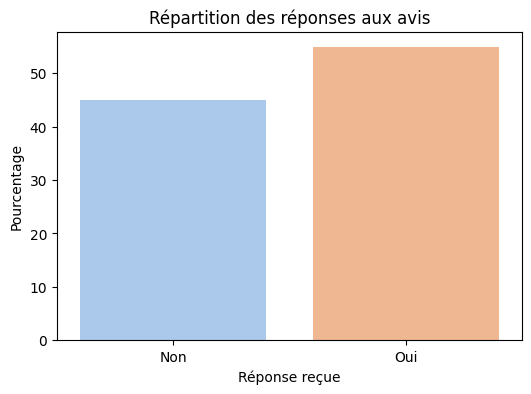

In [73]:
# Visualisation de la répartition des réponses
plt.figure(figsize=(6, 4))
sns.barplot(x=response_distribution.index, y=response_distribution.values, palette='pastel')
plt.title('Répartition des réponses aux avis')
plt.xlabel('Réponse reçue')
plt.ylabel('Pourcentage')
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])
plt.show()

In [74]:
# Analyser la moyenne des notes en fonction de la présence ou non d'une réponse
avg_rating_by_response = df.groupby('reponse')['note'].mean()
print(avg_rating_by_response)

reponse
False    4.851878
True     4.648589
Name: note, dtype: float64


C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\3127728411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_response.index, y=avg_rating_by_response.values, palette='pastel')


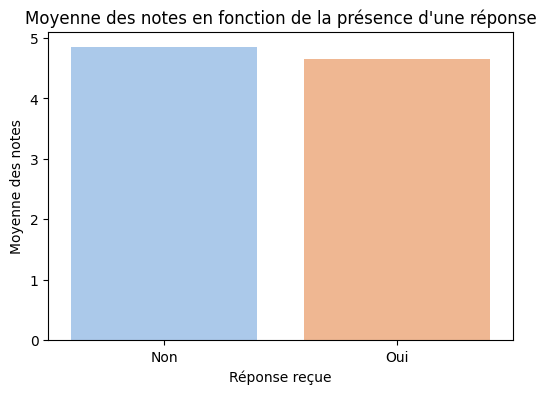

In [75]:
# Visualisation de la moyenne des notes par présence de réponse
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_rating_by_response.index, y=avg_rating_by_response.values, palette='pastel')
plt.title('Moyenne des notes en fonction de la présence d\'une réponse')
plt.xlabel('Réponse reçue')
plt.ylabel('Moyenne des notes')
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])
plt.show()

6. Analyse par entreprise (firm_name)

In [76]:
# Moyenne des notes par entreprise
mean_ratings_by_firm = df.groupby('firm_name')['note'].mean().sort_values(ascending=False).head(10)
print("Moyenne des notes par entreprise :")
print(mean_ratings_by_firm)

Moyenne des notes par entreprise :
firm_name
A1venturesllc                   5.0
AM Financial                    5.0
Active Debt Relief              5.0
Affirmative Debt Relief, LLC    5.0
Alesure                         5.0
CreditBull                      5.0
Crestridge Funding              5.0
Debt Free Pathways, LLC         5.0
Debt Fellow                     5.0
Debt Advice USA                 5.0
Name: note, dtype: float64


C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\2500469653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_ratings_by_firm.values, y=mean_ratings_by_firm.index, palette='coolwarm')


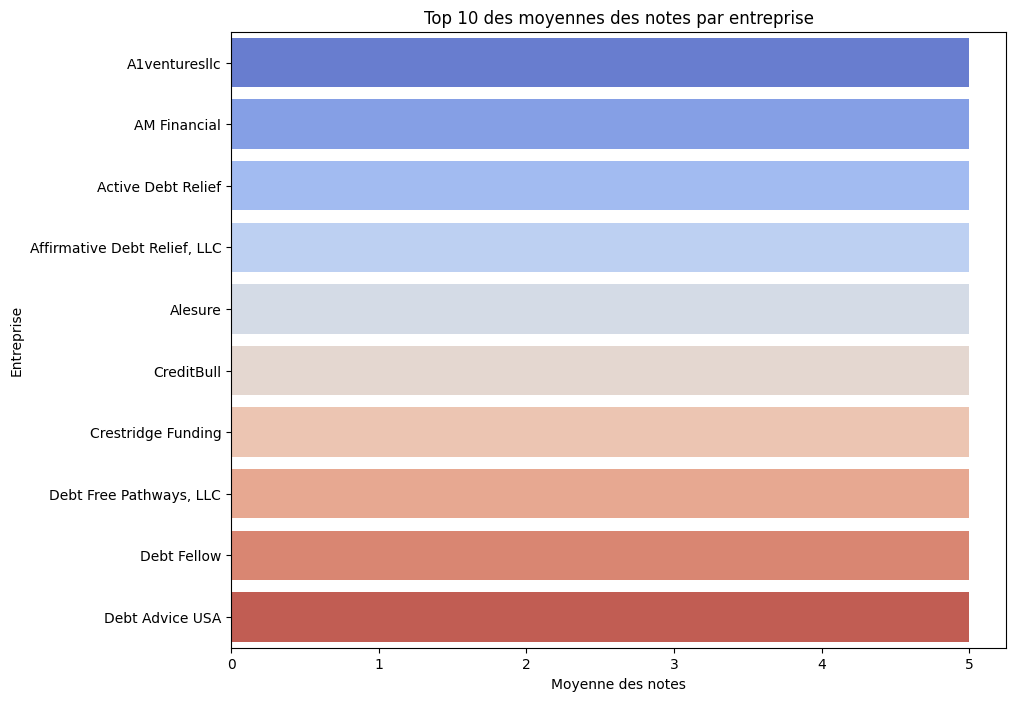

In [77]:
# Visualisation des moyennes des notes par entreprise
plt.figure(figsize=(10, 8))
sns.barplot(x=mean_ratings_by_firm.values, y=mean_ratings_by_firm.index, palette='coolwarm')
plt.title('Top 10 des moyennes des notes par entreprise')
plt.xlabel('Moyenne des notes')
plt.ylabel('Entreprise')

plt.show()


In [78]:
# Nombre d'avis par entreprise
review_counts_by_firm = df['firm_name'].value_counts().head(10)
print("\nNombre d'avis par entreprise :")
print(review_counts_by_firm)


Nombre d'avis par entreprise :
firm_name
Freedom Debt Relief        42176
National Debt Relief       34302
CreditAssociates           16532
Americor                   14690
TurboDebt                  11103
JG Wentworth               10245
ClearOne Advantage, LLC     8657
Consolidated Credit         7542
Accredited Debt Relief      6857
Beyond Finance              6452
Name: count, dtype: int64


C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\2514529502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts_by_firm.values, y=review_counts_by_firm.index, palette='viridis')


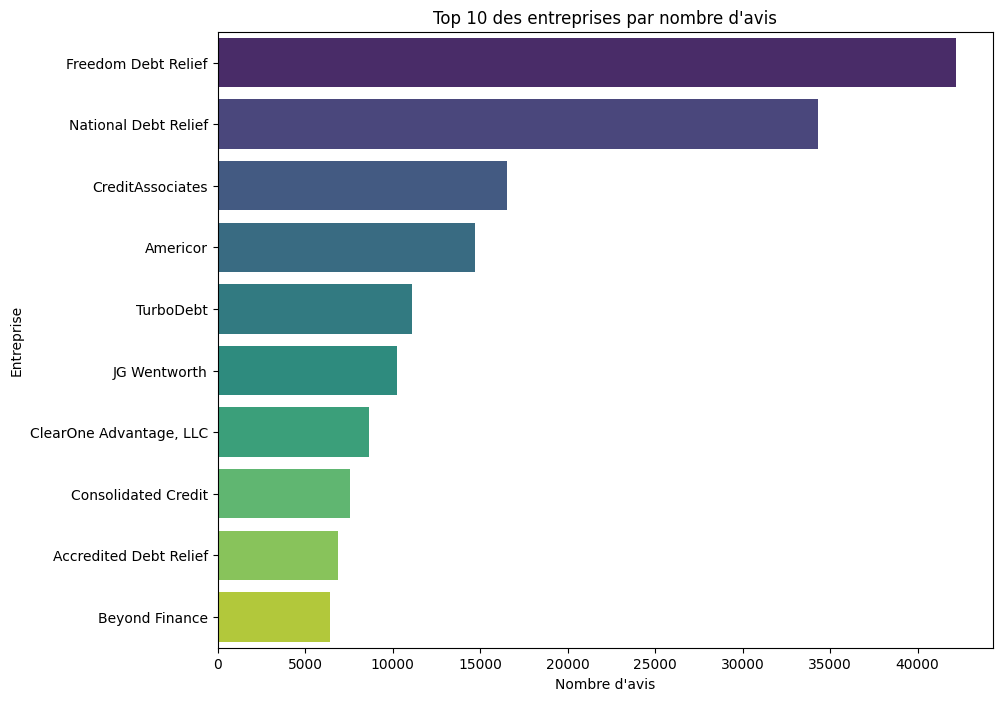

In [79]:
# Visualisation du nombre d'avis par entreprise
plt.figure(figsize=(10, 8))
sns.barplot(x=review_counts_by_firm.values, y=review_counts_by_firm.index, palette='viridis')
plt.title('Top 10 des entreprises par nombre d\'avis')
plt.xlabel('Nombre d\'avis')
plt.ylabel('Entreprise')
plt.show()

In [80]:
# Proportion d'avis positifs (> 3) par entreprise
positive_reviews_by_firm = df[df['note'] > 3].groupby('firm_name').size()
proportion_positive_reviews_by_firm = (positive_reviews_by_firm / review_counts_by_firm) * 100
proportion_positive_reviews_by_firm = proportion_positive_reviews_by_firm.sort_values(ascending=False).head(10)
print("\nProportion d'avis positifs par entreprise :")
print(proportion_positive_reviews_by_firm)


Proportion d'avis positifs par entreprise :
firm_name
TurboDebt                  99.342520
CreditAssociates           97.882894
Accredited Debt Relief     97.345778
ClearOne Advantage, LLC    95.829964
Consolidated Credit        95.611244
Americor                   95.479918
National Debt Relief       94.373506
JG Wentworth               94.016593
Freedom Debt Relief        90.591806
Beyond Finance             86.670800
dtype: float64


C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\784251089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportion_positive_reviews_by_firm.values, y=proportion_positive_reviews_by_firm.index, palette='magma')


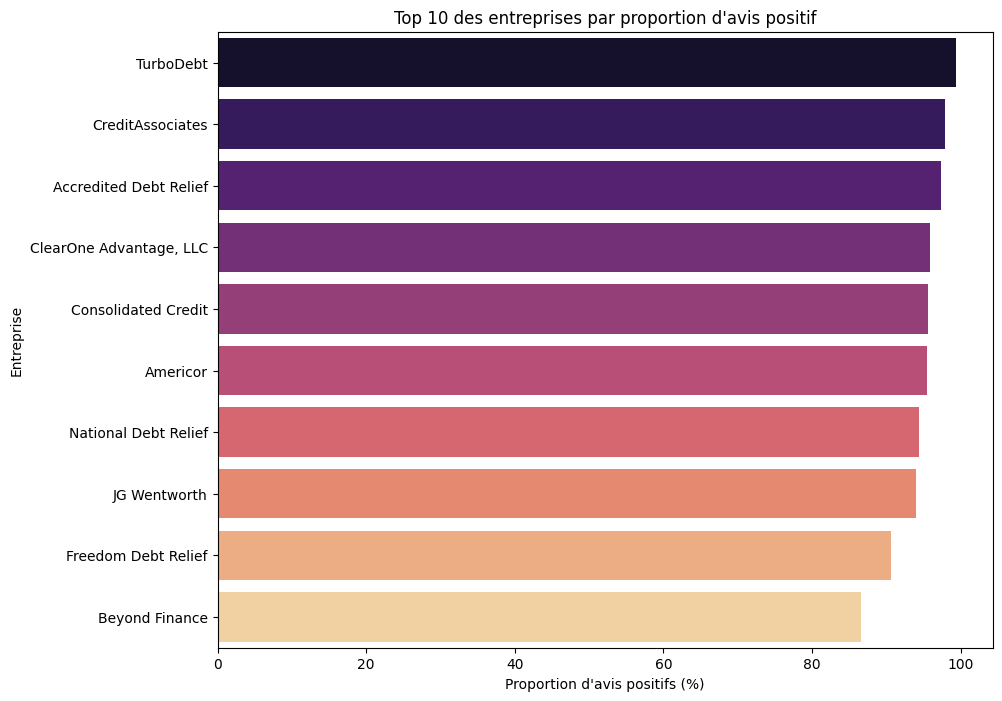

In [81]:
# Visualisation de la proportion d'avis positifs par entreprise
plt.figure(figsize=(10, 8))
sns.barplot(x=proportion_positive_reviews_by_firm.values, y=proportion_positive_reviews_by_firm.index, palette='magma')
plt.title('Top 10 des entreprises par proportion d\'avis positif')
plt.xlabel('Proportion d\'avis positifs (%)')
plt.ylabel('Entreprise')
plt.show()

In [82]:
# Sentiment moyen par entreprise
avg_sentiment_by_firm = df.groupby('firm_name')['sentiment'].mean().sort_values(ascending=False).head(10)
print("\nSentiment moyen par entreprise :")
print(avg_sentiment_by_firm)


Sentiment moyen par entreprise :
firm_name
Clearstarttoday                         0.974100
AM Financial                            0.962800
Debt Advice USA                         0.951400
True Fulfillment Credit Repair          0.945800
Cooperscreditconsultinginternational    0.927900
reliabledebtconsultants.com             0.926200
Remedy Finance                          0.918400
Creditorssolutions                      0.868262
ClearPath Debt Relief                   0.866862
Financialliteracy                       0.862500
Name: sentiment, dtype: float64


C:\Users\Maryse\AppData\Local\Temp\ipykernel_4708\3378704551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment_by_firm.values, y=avg_sentiment_by_firm.index, palette='Spectral')


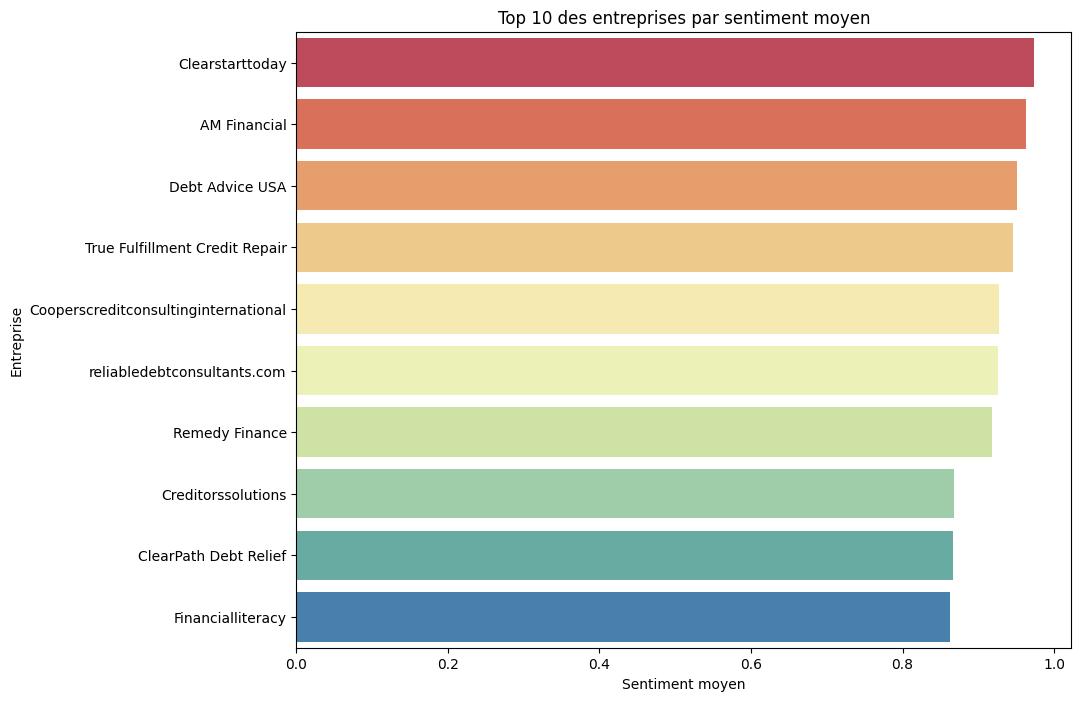

In [83]:
# Visualisation du sentiment moyen par entreprise
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_sentiment_by_firm.values, y=avg_sentiment_by_firm.index, palette='Spectral')
plt.title('Top 10 des entreprises par sentiment moyen')
plt.xlabel('Sentiment moyen')
plt.ylabel('Entreprise')
plt.show()

In [84]:
from datetime import datetime

7. Segmentation par dates clés

In [85]:
# Convertir les colonnes de date en objets datetime
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['experience_date'] = pd.to_datetime(df['experience_date'], errors='coerce')
df['extract_date'] = pd.to_datetime(df['extract_date'], errors='coerce')

# Afficher les dates converties pour vérifier si tout est correct
print(df[['review_date', 'experience_date', 'extract_date']])


       review_date experience_date extract_date
0       2023-05-23      2023-05-22   2024-08-23
1       2023-05-23      2023-05-22   2024-08-23
2       2023-05-23      2023-05-22   2024-08-23
3       2023-05-23      2023-05-22   2024-08-23
4       2023-05-23      2023-05-22   2024-08-23
...            ...             ...          ...
214642  2022-08-19      2022-08-19   2024-08-28
214643  2022-08-19      2022-08-19   2024-08-28
214644  2022-08-19      2022-08-19   2024-08-28
214645  2022-08-13      2022-08-13   2024-08-28
214646  2022-08-12      2022-08-12   2024-08-28

[214647 rows x 3 columns]


In [86]:
# Définir la date clé pour la segmentation
key_date = datetime(2023, 6, 1)

In [87]:
# Segmenter les avis avant et après la date clé
before_key_date = df[df['review_date'] < key_date]
after_key_date = df[df['review_date'] >= key_date]


In [88]:
# Statistiques descriptives avant la date clé
print("Statistiques avant la date clé:")
print(before_key_date.describe())

# Statistiques descriptives après la date clé
print("\nStatistiques après la date clé:")
print(after_key_date.describe())

Statistiques avant la date clé:
                     experience_date                   extract_date  \
count                         168581                         168581   
mean   2020-05-11 20:58:05.517347584  2024-08-26 05:59:30.146101760   
min              2013-01-10 00:00:00            2024-08-23 00:00:00   
25%              2019-01-22 00:00:00            2024-08-25 00:00:00   
50%              2020-02-05 00:00:00            2024-08-26 00:00:00   
75%              2022-03-22 00:00:00            2024-08-28 00:00:00   
max              2023-05-31 00:00:00            2024-08-28 00:00:00   
std                              NaN                            NaN   

                         review_date    review_note           note  \
count                         168581  168581.000000  168581.000000   
mean   2020-05-13 07:00:26.415788288       4.742468       4.742468   
min              2013-01-10 00:00:00       1.000000       1.000000   
25%              2019-01-22 00:00:00       5.000

In [89]:
# Analyse comparative des notes moyennes avant et après la date clé
average_note_before = before_key_date['note'].astype(float).mean()
average_note_after = after_key_date['note'].astype(float).mean()

print(f"\nNote moyenne avant la date clé: {average_note_before:.2f}")
print(f"Note moyenne après la date clé: {average_note_after:.2f}")


Note moyenne avant la date clé: 4.74
Note moyenne après la date clé: 4.73


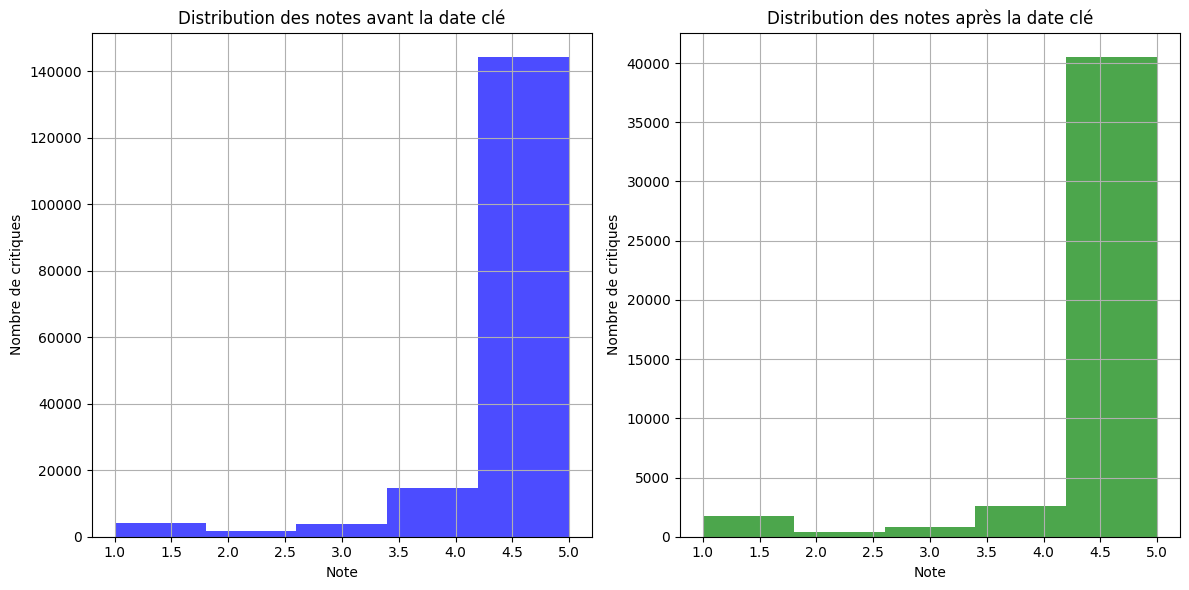

In [90]:
# Histogramme des notes avant et après la date clé
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
before_key_date['note'].astype(float).hist(bins=5, alpha=0.7, color='blue')
plt.title('Distribution des notes avant la date clé')
plt.xlabel('Note')
plt.ylabel('Nombre de critiques')

plt.subplot(1, 2, 2)
after_key_date['note'].astype(float).hist(bins=5, alpha=0.7, color='green')
plt.title('Distribution des notes après la date clé')
plt.xlabel('Note')
plt.ylabel('Nombre de critiques')

plt.tight_layout()
plt.show()

8. Taux de réponse (reponse)


In [91]:
# Convertir la colonne "reponse" en booléen
df['reponse'] = df['reponse'].apply(lambda x: True if str(x).lower() == 'true' else False)

In [92]:
# Taux de réponse par entreprise
response_rates = (df.groupby('firm_name')['reponse'].mean() * 100).head(20)
print("\nTaux de réponse par entreprise (%):")
print(response_rates)


Taux de réponse par entreprise (%):
firm_name
A1venturesllc                                          0.000000
AM Financial                                         100.000000
Accredited Debt Relief                                87.268485
Active Debt Relief                                     0.000000
Affirmative Debt Relief, LLC                           0.000000
Alesure                                               28.571429
Alleviate Financial Solutions                         47.348485
Alliance One Funding                                  55.555556
Alliance Tax Advocate                                 75.000000
Allied Enrollment Centers                              0.000000
Altitude Debt Advisors                                37.209302
America Debt Resolutions                              86.666667
American Credit Card Solutions                        69.919427
American Debt Relief                                  12.138105
American Financial Solutions                          10.

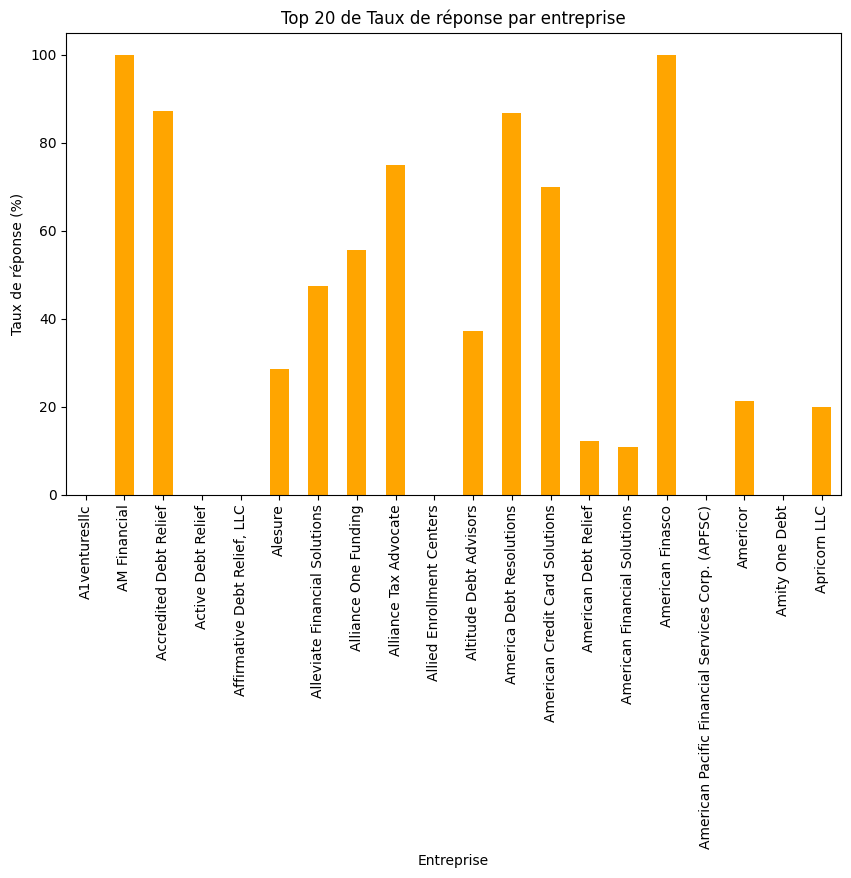

In [93]:
# Visualisation des taux de réponse par entreprise
plt.figure(figsize=(10, 6))
response_rates.plot(kind='bar', color='orange')
plt.title('Top 20 de Taux de réponse par entreprise')
plt.xlabel('Entreprise')
plt.ylabel('Taux de réponse (%)')
plt.show()

9. Corrélations

In [94]:
# Calculer la longueur du texte des avis en s'assurant que les valeurs sont des chaînes de caractères
df['text_length'] = df['review_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)



In [95]:
# Calculer la corrélation entre la note et la longueur du texte
correlation = df['text_length'].astype(float).corr(df['note'].astype(float))
print(f"\nCorrélation entre la note et la longueur du texte: {correlation:.2f}")



Corrélation entre la note et la longueur du texte: -0.27


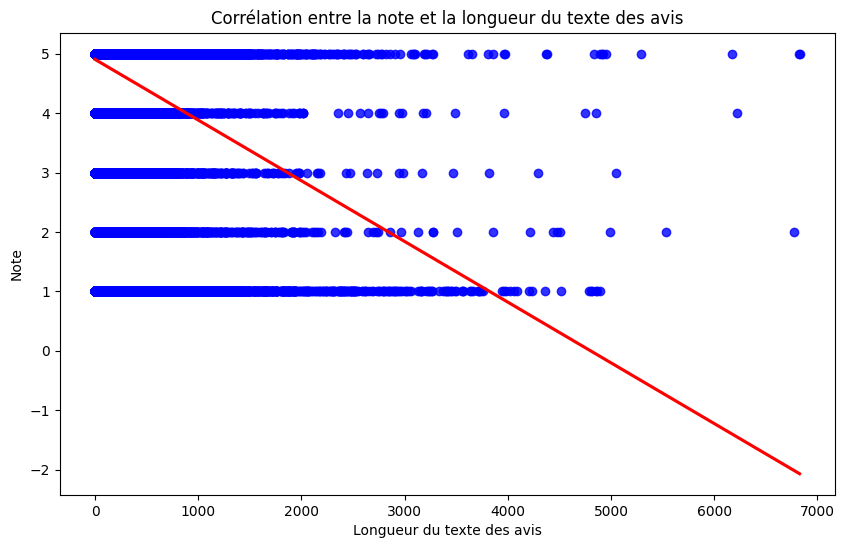

In [98]:
# Visualisation de la relation entre la longueur du texte et la note
plt.figure(figsize=(10, 6))
sns.regplot(x=df['text_length'], y=df['note'].astype(float), ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Corrélation entre la note et la longueur du texte des avis')
plt.xlabel('Longueur du texte des avis')
plt.ylabel('Note')
plt.show()


Conclusion 

La corrélation = −0.27 : la note et la longueur du texte des avis indique une corrélation négative faible.

Interprétation de la Corrélation:
Faible Corrélation Négative : Cela signifie qu'il existe une légère tendance selon laquelle les avis plus longs tendent à avoir des notes plus basses, mais cette relation est loin d'être forte.

Magnitude : La valeur −0.27 est relativement proche de 0, ce qui signifie que la relation entre la longueur du texte et la note est faible. Dans la pratique, cela signifie que la longueur du texte des avis n'est pas un bon prédicteur de la note donnée.

Sens de la Corrélation : Comme c'est une corrélation négative, cela suggère qu'à mesure que la longueur du texte augmente, la note tend à diminuer légèrement, mais cette tendance n'est pas très marquée.

Pratique : Bien que cette corrélation soit statistiquement présente, elle n'est pas assez forte pour en tirer des conclusions solides. Il pourrait être intéressant de creuser plus profondément avec des analyses supplémentaires ou de considérer d'autres facteurs qui pourraient influencer les notes des avis.

In [99]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Calcul du coefficient de corrélation de Pearson
correlation_coef, p_value = pearsonr(df['text_length'], df['note'])

# Régression linéaire pour calculer le coefficient de détermination (R²)
X = df['text_length'].values.reshape(-1, 1)
y = df['note'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

correlation_coef, r2

KeyError: 'longueur_texte'